Week 04 Assignment: Individual Coding Assignment (Yaofa Gong 306299097)

# Assignment Description.

For this assignment, I am going to continue to explore the previous week's data (age distribution of the population of Los Angeles). I will continue to try to explore more data visualization and analysis in conjunction with this week's lab session. The topic of our group assignment is: exploring the distribution patterns of traffic accidents and I am looking at mostly age distribution data. Since I have already tried many ways to visualize the data in the previous assignment, I will try to connect the data with maps to create more intuitive and varied visualizations in this assignment.

# Import pandas and other libraries

In [23]:
import pandas as pd
import geopandas as gpd
import os
import folium 
import matplotlib.pyplot as plt

# Load the data file.

In [2]:
# First we make some preliminary adjustments to the data for subsequent experiments.
# Import the data and change the FIPS, STATE, and COUNTRY columns to string form to match the actual coordinates later.
LA_AGE = pd.read_csv(
    '/home/jovyan/24W-UP221/up206a-Yaofa/Data/R13559084_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)
LA_AGE.head()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,...,PCT_SE_C01001_015,PCT_SE_C01001_016,PCT_SE_C01001_017,PCT_SE_C01001_018,PCT_SE_C01001_019,PCT_SE_C01001_020,PCT_SE_C01001_021,PCT_SE_C01001_022,PCT_SE_C01001_023,PCT_SE_C01001_024
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,3.99,6.38,2.57,5.46,4.98,7.82,2.22,3.16,1.89,0.85
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,9.80,10.83,4.71,3.75,3.07,3.53,5.67,3.07,2.91,3.58
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,9.82,7.10,3.45,3.65,1.58,3.56,4.60,3.36,2.13,1.12
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,5.32,5.35,4.45,2.08,2.42,2.88,5.94,0.45,2.98,4.85
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,3.99,7.23,0.00,2.53,3.56,3.38,2.53,2.10,2.28,2.49


In [4]:
# Remove unneeded lines
LA_AGE = LA_AGE.dropna(axis=1,how="all")

# Keep needed columns and rename the lines that need to be kept.
columns_to_keep = ['Geo_FIPS',
                   'SE_C01001_001',
                   'SE_C01001_002',
                   'SE_C01001_003',
                   'SE_C01001_004',
                   'SE_C01001_005',
                   'SE_C01001_006',
                   'SE_C01001_007',
                   'SE_C01001_008',
                   'SE_C01001_009',
                   'SE_C01001_010',
                   'SE_C01001_011',
                   'SE_C01001_012',
                   'SE_C01001_013',
                   'SE_C01001_014',
                   'SE_C01001_015',
                   'SE_C01001_016',
                   'SE_C01001_017',
                   'SE_C01001_018',
                   'SE_C01001_019',
                   'SE_C01001_020',
                   'SE_C01001_021',
                   'SE_C01001_022',
                   'SE_C01001_023',
                   'SE_C01001_024']
LA_AGE_FILTERED = LA_AGE[columns_to_keep]

LA_AGE_FILTERED.columns = ['FIPS',
'Total',
'Under 5 Years',
'5 to 9 Years',
'10 to 14 Years',
'15 to 17 Years',
'18 and 19 Years',
'20 Years',
'21 Years',
'22 to 24 Years',
'25 to 29 Years',
'30 to 34 Years',                          
'35 to 39 Years',
'40 to 44 Years',
'45 to 49 Years',
'50 to 54 Years',
'55 to 59 Years',
'60 and 61 Years',
'62 to 64 Years',
'65 and 66 Years',
'67 to 69 Years',
'70 to 74 Years',
'75 to 79 Years',
'80 to 84 Years',
'85 Years and Over']

LA_AGE_FILTERED_without_zero = LA_AGE_FILTERED[LA_AGE_FILTERED['Total']!=0]

LA_AGE_FILTERED_without_zero.sample(5)

,FIPS,Total,Under 5 Years,5 to 9 Years,10 to 14 Years,15 to 17 Years,18 and 19 Years,20 Years,21 Years,22 to 24 Years,...,50 to 54 Years,55 to 59 Years,60 and 61 Years,62 to 64 Years,65 and 66 Years,67 to 69 Years,70 to 74 Years,75 to 79 Years,80 to 84 Years,85 Years and Over
641,06037211122,2641,31,134,303,48,20,0,122,233,...,97,126,12,10,23,32,21,115,17,28
807,06037231603,2788,211,243,210,102,102,0,38,73,...,137,160,0,64,25,63,87,54,37,29
2330,06037900807,3859,326,220,284,195,104,17,70,162,...,214,308,104,109,144,102,80,55,12,13
268,06037131021,3423,123,335,405,218,137,88,23,94,...,197,71,190,59,20,58,51,54,29,14
2028,06037576302,3278,185,230,162,220,131,37,45,115,...,171,248,80,86,22,74,95,29,86,45


In [6]:
# Load a data that can correspond to a FIPS code that records the geographic location represented by the FIPS code.
map_label = gpd.read_file('/home/jovyan/24W-UP221/up206a-Yaofa/Data/Census_Tracts_2020.geojson') # Load a data that can correspond to a FIPS code that records the geographic location represented by the FIPS code.
map_label.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [8]:
# Creating columns that contain geographic information makes it easier to merge the data later.
map_label['FIPS'] ='06' + '037' + map_label['CT20']

In [12]:
# Merge data.
LA_AGE_DISTRIBUTION=map_label.merge(LA_AGE_FILTERED_without_zero,on="FIPS")
LA_AGE_DISTRIBUTION.to_csv('/home/jovyan/24W-UP221/up206a-Yaofa/Data/LA_AGE_DISTRIBUTION.csv')

<Axes: >

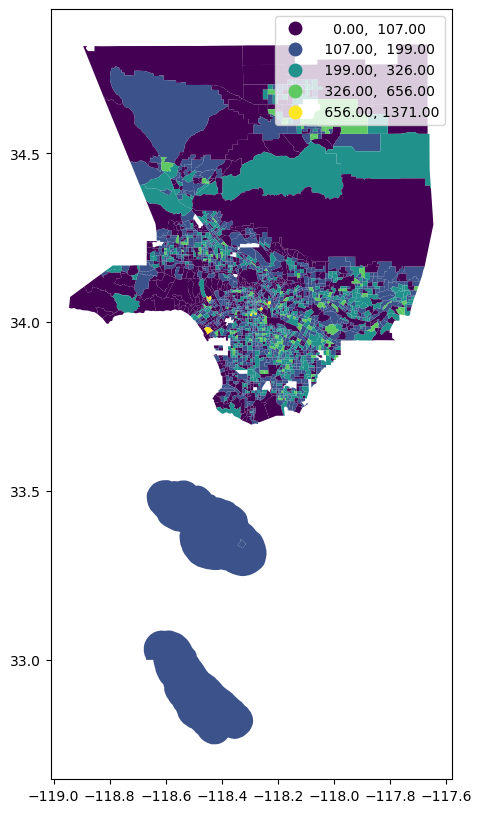

In [10]:
# Attempts at preliminary diagramming.
LA_AGE_DISTRIBUTION.plot(figsize=(10,10), column='22 to 24 Years', legend=True, scheme='NaturalBreaks')

# Now let's import a new dataset (the 2018 to 2022 traffic accident dataset, one of our group's research datasets), and I'm going to try to load both onto the same map.

In [11]:
Incident_data = pd.read_csv('/home/jovyan/24W-UP221/up206a-Yaofa/Data/Traffic_Collision_Data_from_2010_to_Present_20240204.csv')
Incident_data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,190814036,08/12/2019,08/11/2019,2200,8,West LA,849,997,TRAFFIC COLLISION,3004 3028 3030 3035 3036 3101 3401 3701 4027,57.0,F,W,101.0,STREET,OLYMPIC BL,SHERBOURNE AV,"(34.0594, -118.3793)"
1,190814090,08/13/2019,08/13/2019,830,8,West LA,859,997,TRAFFIC COLLISION,3006 3028 3030 3035 3037 3102 3401 3701 4008,42.0,M,O,101.0,STREET,ROBERTSON BL,CASHIO ST,"(34.0515, -118.3842)"
2,190814095,08/13/2019,08/13/2019,1135,8,West LA,813,997,TRAFFIC COLLISION,3004 3028 3030 3035 3037 3101 3401 3701 4008,50.0,M,B,101.0,STREET,SUNSET BL,BARRINGTON PL,"(34.0665, -118.4704)"
3,190814146,08/14/2019,08/14/2019,1450,8,West LA,842,997,TRAFFIC COLLISION,3006 3028 3030 3035 3037 3101 3401 3701 4008,30.0,F,W,101.0,STREET,GRANVILLE AV,WILSHIRE BL,"(34.0461, -118.4609)"
4,190814463,08/21/2019,08/21/2019,940,8,West LA,832,997,TRAFFIC COLLISION,3004 3025 3035 3036 3101 3401 3701 4027,39.0,M,B,101.0,STREET,WILSHIRE BL,BARRINGTON AV,"(34.0487, -118.4618)"


# First we convert the data into the form of point coordinates.

In [13]:
# Import the shapely module from the GeoPandas library.
from shapely.geometry import Point

In [14]:
# Define a function to transform coordinate points.
def parse_location(location_str):
    try:
        lat, lon = map(float, location_str.strip("()").split(", "))
        return Point(lon, lat)
    except:
        return None

In [16]:
# Apply the function
Incident_data['geometry'] = Incident_data['Location'].apply(parse_location)

# Remove unneeded lines
Incident_data = Incident_data.dropna(subset=['geometry'])

# Harmonize the coordinate system and remove points that do not make sense.

In [20]:
# Convert data into GeoPandas format (geographic data).
gdf_LA_AGE_DISTRIBUTION = gpd.GeoDataFrame(LA_AGE_DISTRIBUTION, geometry='geometry')
gdf_Incident_data = gpd.GeoDataFrame(Incident_data, geometry='geometry')

# Set up and harmonize coordinate systems.
gdf_LA_AGE_DISTRIBUTION.set_crs(epsg=4326, inplace=True)
gdf_Incident_data.set_crs(epsg=4326, inplace=True)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location,geometry
0,190814036,08/12/2019,08/11/2019,2200,8,West LA,849,997,TRAFFIC COLLISION,3004 3028 3030 3035 3036 3101 3401 3701 4027,57.0,F,W,101.0,STREET,OLYMPIC BL,SHERBOURNE AV,"(34.0594, -118.3793)",POINT (-118.37930 34.05940)
1,190814090,08/13/2019,08/13/2019,830,8,West LA,859,997,TRAFFIC COLLISION,3006 3028 3030 3035 3037 3102 3401 3701 4008,42.0,M,O,101.0,STREET,ROBERTSON BL,CASHIO ST,"(34.0515, -118.3842)",POINT (-118.38420 34.05150)
2,190814095,08/13/2019,08/13/2019,1135,8,West LA,813,997,TRAFFIC COLLISION,3004 3028 3030 3035 3037 3101 3401 3701 4008,50.0,M,B,101.0,STREET,SUNSET BL,BARRINGTON PL,"(34.0665, -118.4704)",POINT (-118.47040 34.06650)
3,190814146,08/14/2019,08/14/2019,1450,8,West LA,842,997,TRAFFIC COLLISION,3006 3028 3030 3035 3037 3101 3401 3701 4008,30.0,F,W,101.0,STREET,GRANVILLE AV,WILSHIRE BL,"(34.0461, -118.4609)",POINT (-118.46090 34.04610)
4,190814463,08/21/2019,08/21/2019,940,8,West LA,832,997,TRAFFIC COLLISION,3004 3025 3035 3036 3101 3401 3701 4027,39.0,M,B,101.0,STREET,WILSHIRE BL,BARRINGTON AV,"(34.0487, -118.4618)",POINT (-118.46180 34.04870)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7869,210817301,12/04/2021,12/04/2021,1815,8,West LA,817,997,TRAFFIC COLLISION,3006 3028 4027 3034 3037 3101 3401 3701,20.0,NaN,NaN,101.0,STREET,BROXTON AV,WEYBURN AV,"(34.0626, -118.447)",POINT (-118.44700 34.06260)
7870,210809960,06/02/2021,05/10/2021,800,8,West LA,804,997,TRAFFIC COLLISION,3010 3028 3104 4027 3035 3037,43.0,F,O,101.0,STREET,N KENTER AV,CLOUD LN,"(34.0798, -118.4929)",POINT (-118.49290 34.07980)
7871,230806614,03/02/2023,12/01/2021,1950,8,West LA,848,997,TRAFFIC COLLISION,3003 3024 3035 3036 3101 3401 3701 4008,55.0,M,W,101.0,STREET,CENTURY PARK W,OLYMPIC BL,"(34.0536, -118.4115)",POINT (-118.41150 34.05360)
7872,210815973,11/02/2021,11/02/2021,900,8,West LA,819,997,TRAFFIC COLLISION,3004 3028 4027 3033 3034 3037 3101 3401 3701,56.0,F,H,101.0,STREET,SUNSET BL,BEVERLY GLEN RD,"(34.0808, -118.4354)",POINT (-118.43540 34.08080)


In [21]:
# Filter out invalid coordinate points
gdf_Incident_data = gdf_Incident_data[(gdf_Incident_data.geometry.x != 0) & (gdf_Incident_data.geometry.y != 0)]

<Axes: >

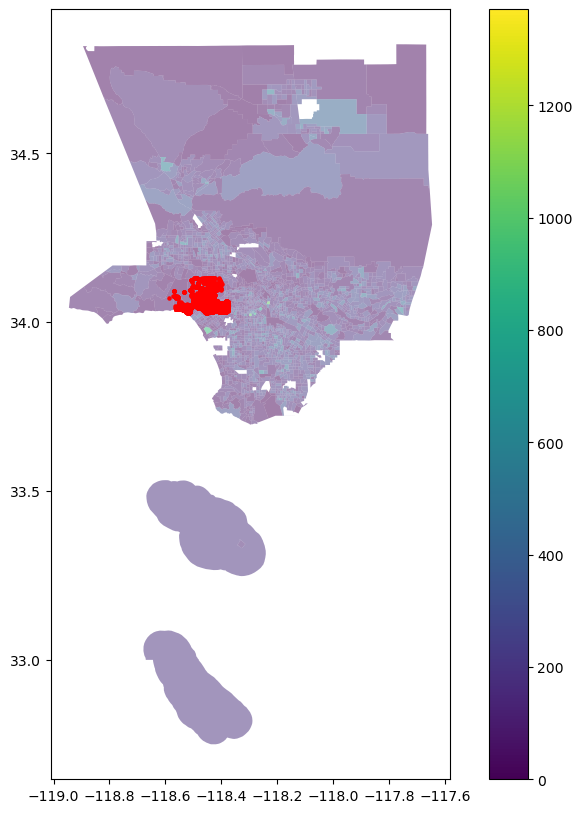

In [26]:
# Creation of maps combining age distribution and accident points
fig, ax = plt.subplots(figsize=(10, 10))
gdf_LA_AGE_DISTRIBUTION.plot(ax=ax, column='22 to 24 Years', legend=True, alpha=0.5)  # Age distribution map, semi-transparent so that accident points can be seen
gdf_Incident_data.plot(ax=ax, color='red', markersize=5)    # Map of Accident Points

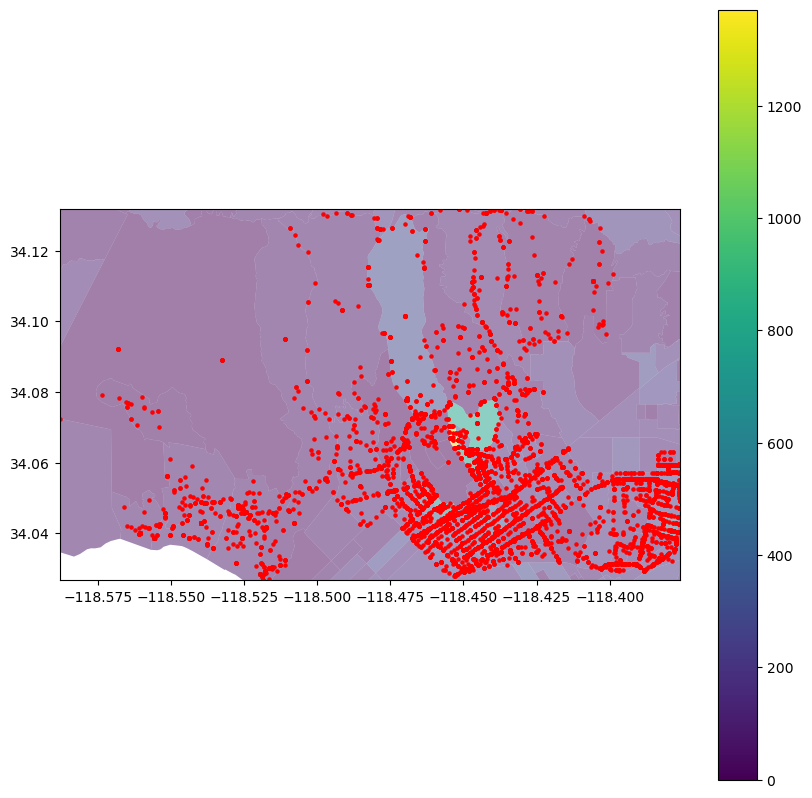

In [30]:
# Adjusts the view range to the coordinate point range of the traffic accident data.
fig, ax = plt.subplots(figsize=(10, 10))
gdf_LA_AGE_DISTRIBUTION.plot(ax=ax, column='22 to 24 Years', legend=True, alpha=0.5)  # Age distribution map, semi-transparent so that accident points can be seen
gdf_Incident_data.plot(ax=ax, color='red', markersize=5)    # Map of Accident Points

gdf_Incident_data_bounds = gdf_Incident_data.total_bounds

ax.set_xlim([gdf_Incident_data_bounds[0], gdf_Incident_data_bounds[2]])
ax.set_ylim([gdf_Incident_data_bounds[1], gdf_Incident_data_bounds[3]])

plt.show()